# <center><b> <em> Data Preprocessing </em> </b></center>

## <font color="green"> | - Import des Biblio et Dataframe</font>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
# Read the XLSX file
data= pd.read_excel("../data/bronze.xlsx")


#### <font color="yellow"> Attribute Information : </font>

There are 14 attributes in each case of the dataset. They are:

    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [18]:
from ydata_profiling import ProfileReport

# Generate the profiling report
profile = ProfileReport(data, title="Profiling Report")

# Save the report as an HTML file
profile.to_file("profiling_report.html")

/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 49.51it/s]


## <font color="green"> || - Missing Data </font>

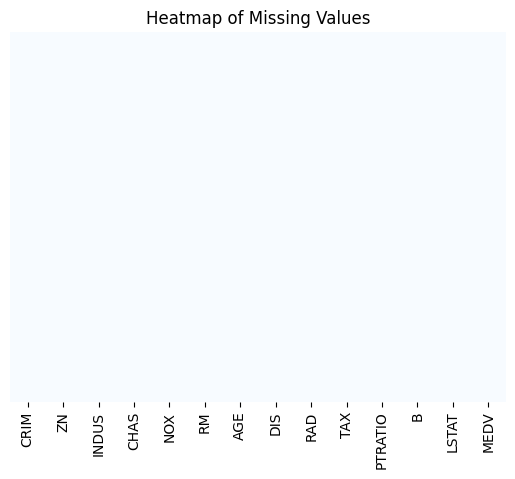

In [7]:
# Create a figure and axes for the plot
fig, ax = plt.subplots()
sns.heatmap(data.isnull(), ax=ax, yticklabels=False, cbar=False, cmap="Blues")
ax.set_title("Heatmap of Missing Values")
plt.show()

In [8]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## <font color="green"> ||| - Duplicated Data </font>

In [10]:
data.duplicated().sum()

0

## <font color="green"> IV - Outliers </font>

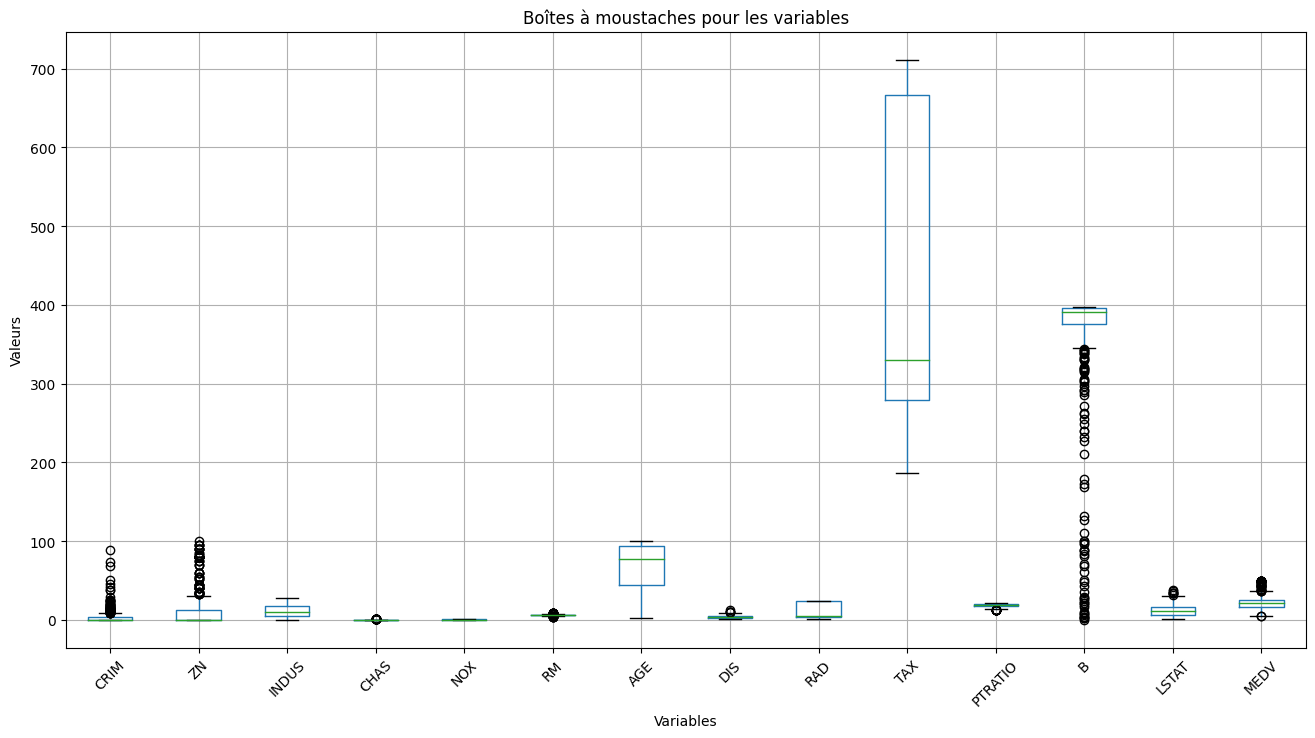

In [17]:
# Sélectionner les colonnes du DataFrame contenant les variables
df = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']]

# Tracer les boîtes à moustaches pour toutes les variables
fig, ax = plt.subplots(figsize=(16, 8))
df.boxplot(ax=ax)
ax.set_title('Boîtes à moustaches pour les variables')
ax.set_xticklabels(data.columns, rotation=45)
ax.set_xlabel('Variables')
ax.set_ylabel('Valeurs')

plt.show()

## <font color="green"> V - Corrélations entre Variables </font>

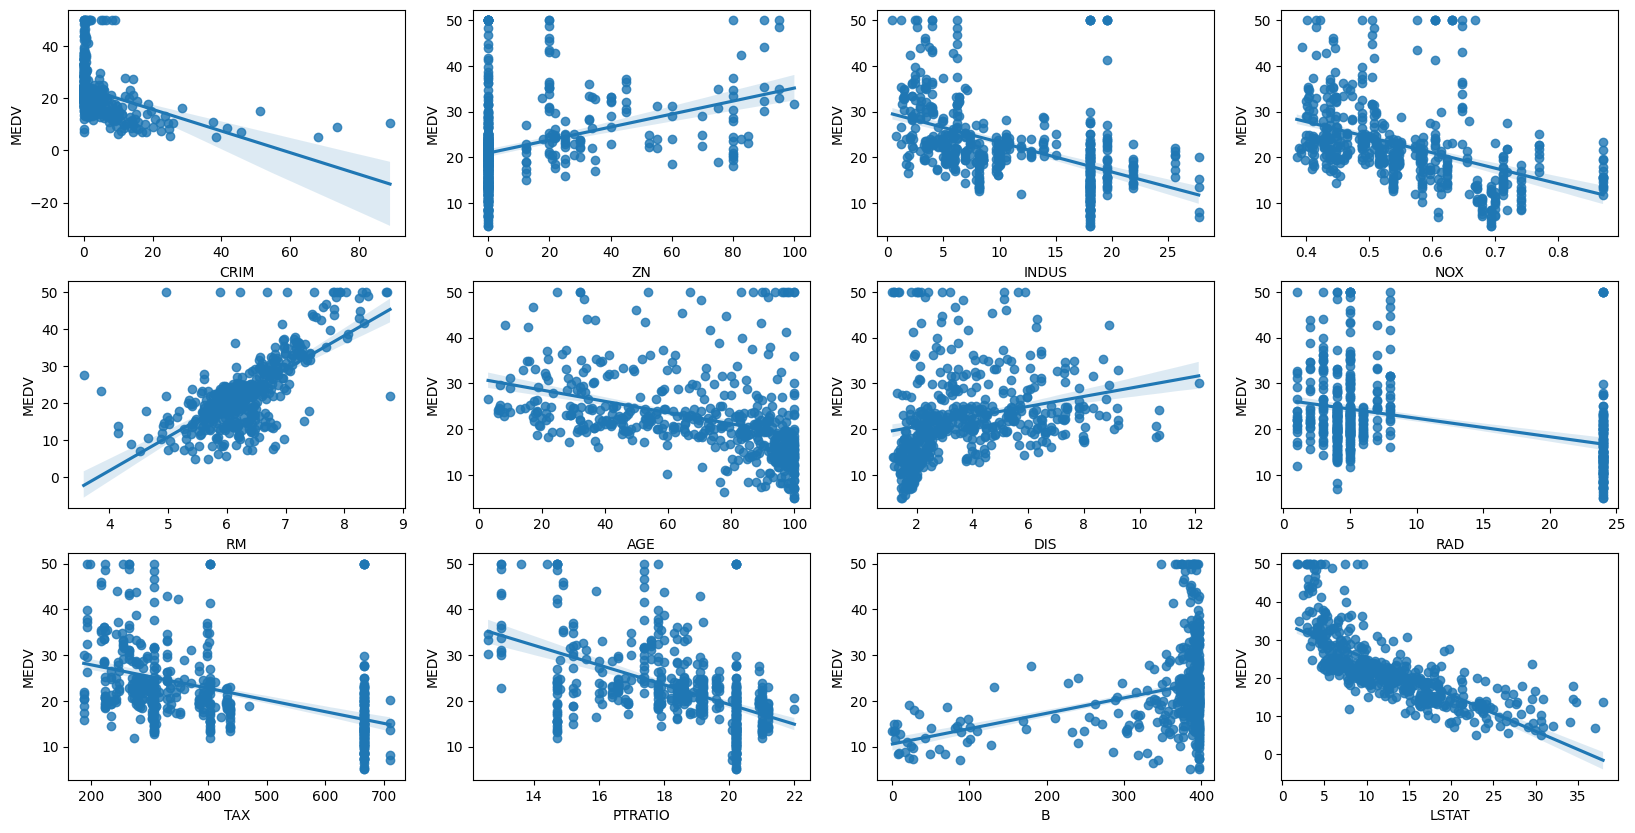

In [21]:
columns = ['CRIM', 'ZN', 'INDUS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

plt.figure(figsize=(20, 10))
i=0
for col in columns:
    i=i+1
    plt.subplot(3,4,i)
    sns.regplot(x = col, y = 'MEDV', data = data)
plt.show()


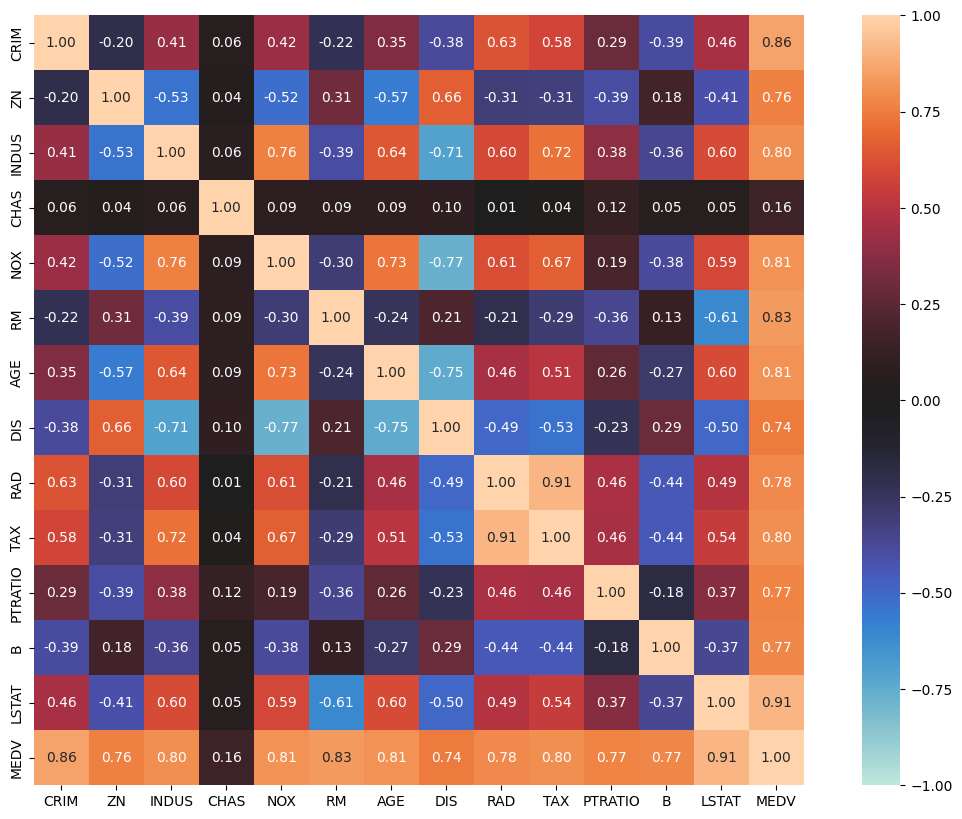

{'corr':              CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
 CRIM     1.000000 -0.200469  0.406583  0.055892  0.420972 -0.219247  0.352734   
 ZN      -0.200469  1.000000 -0.533828  0.042697 -0.516604  0.311991 -0.569537   
 INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
 CHAS     0.055892  0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
 NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
 RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
 AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
 DIS     -0.379670  0.664408 -0.708027  0.099176 -0.769230  0.205246 -0.747881   
 RAD      0.625505 -0.311948  0.595129  0.007368  0.611441 -0.209847  0.456022   
 TAX      0.582764 -0.314563  0.720760  0.035587  0.668023 -0.292048  0.506456   
 PTRATIO  0.289946 -0.391679  0.383248  0.121515  0.188933 -0.355501  0.261515   
 B      

In [23]:
associations(data,nominal_columns=['CHAS'], numerical_columns=['CRIM', 'ZN', 'INDUS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], 
             mark_columns=False,nom_nom_assoc='cramer',num_num_assoc='pearson', nom_num_assoc='correlation_ratio', symmetric_nom_nom=True, symmetric_num_num=True, 
             display_rows='all', display_columns='all', hide_rows=None, hide_columns=None, cramers_v_bias_correction=True, 
             nan_strategy='replace', nan_replace_value=0.0, ax=None,  annot=True, fmt='.2f',cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, 
             compute_only=False, clustering=False, title=None,filename=None, multiprocessing=False, max_cpu_cores=None, figsize=(15, 10))

## <font color="green"> VI - Modèles de Prévision </font>

## 1) Spliting data

In [24]:
X= data.drop('MEDV', axis =1)
y = data['MEDV']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
print("Traing Data Shape of x and y respectively:  ", X_train.shape, y_train.shape)
print("Testing Data Shape of x and y respectively:  ", X_test.shape, y_test.shape)

Traing Data Shape of x and y respectively:   (404, 13) (404,)
Testing Data Shape of x and y respectively:   (102, 13) (102,)


## 2) Building Models

###   * <font color="yellow"> Linear Regression  </font>

In [46]:
categorial_features=['CHAS']
numeric_features=['CRIM', 'ZN', 'INDUS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Define the column transformer to apply the OneHotEncoder to categorical features
# and the MinMaxScaler to numerical features
preprocessor = ColumnTransformer(
    transformers=[
       # ('cat', OneHotEncoder(handle_unknown='ignore'), categorial_features),
        ('num', MinMaxScaler(), numeric_features)
    ])

# Définition du pipeline qui combine le préprocesseur avec le modèle de régression linéaire
model_LR = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Définition de la grille des hyperparamètres à tester
param_grid = {
    'regressor__fit_intercept': [True, False]
}

# Création de l'objet GridSearchCV pour rechercher les meilleurs hyperparamètres
grid_search = GridSearchCV(model_LR, param_grid, cv=5)

# Exécution de la recherche sur la grille des hyperparamètres
grid_search.fit(X_train, y_train)

# Obtention des meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_

# Utilisation des meilleurs hyperparamètres pour créer un nouveau modèle
best_model = model_LR.set_params(**best_params)

# Entraînement du nouveau modèle sur l'ensemble des données d'entraînement
best_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test avec le meilleur modèle
y_pred = best_model.predict(X_test)

In [47]:
# Evaluate the model
score = model_LR.score(X_test, y_test)
print("R-squared score on test set: ", score)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE): ", mse)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

R-squared score on test set:  0.6640648675861125
Mean Squared Error (MSE):  24.635394156374403
Mean Absolute Error (MAE):  3.237242361814496


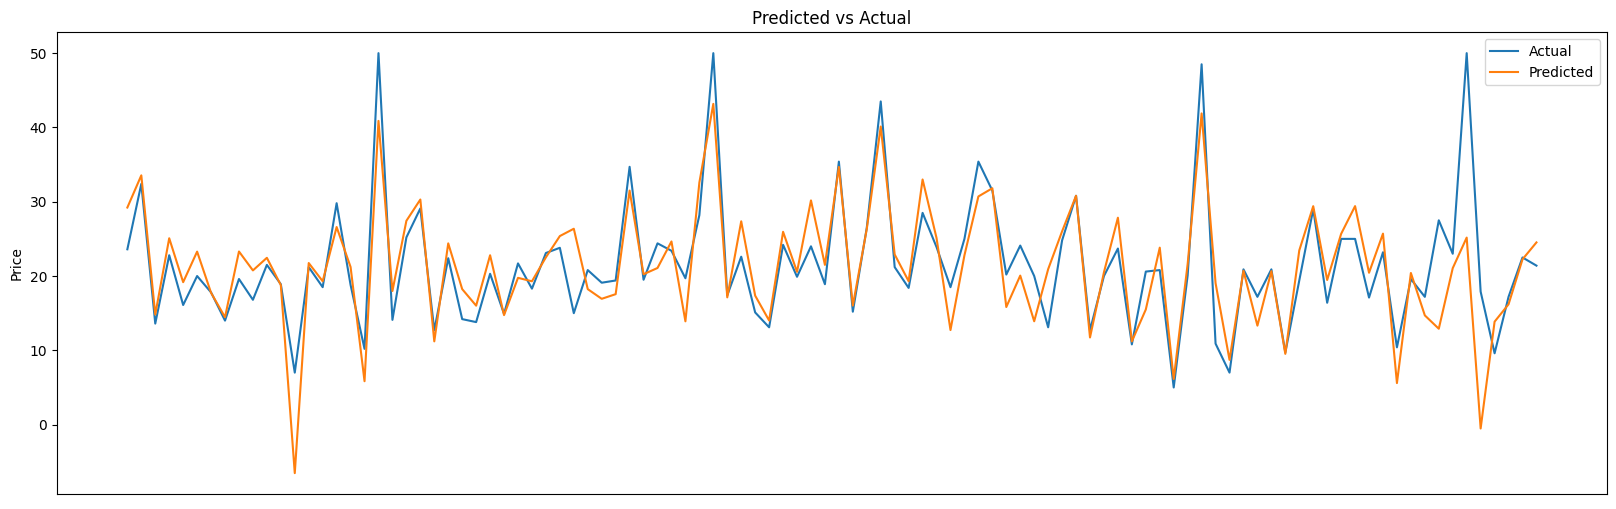

In [48]:

# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_pred)),y_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual')
plt.ylabel('Price')
plt.xticks([])
plt.show()

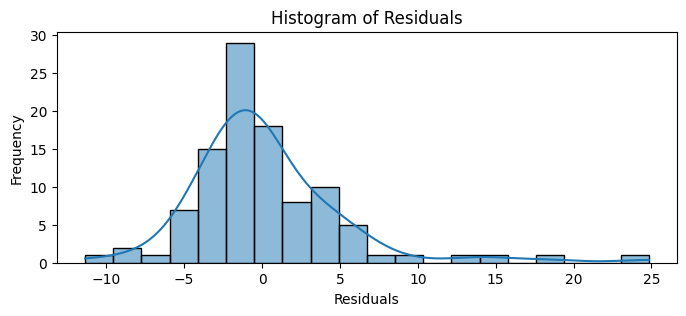

In [32]:
# Generate histogram of residuals
fig, ax = plt.subplots(figsize=(8, 3))
sns.histplot(y_test - y_pred, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

###   * <font color="yellow"> Decision Tree Regressor  </font>

In [49]:
categorial_features=['CHAS']
numeric_features=['CRIM', 'ZN', 'INDUS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# and the MinMaxScaler to numerical features
preprocessor = ColumnTransformer(
    transformers=[
       # ('cat', OneHotEncoder(handle_unknown='ignore'), categorial_features),
        ('num', MinMaxScaler(), numeric_features)
    ])

# Définition du pipeline qui combine le préprocesseur avec le modèle de régression par arbre de décision
model_DT = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor())
])

# Définition de la grille des hyperparamètres à tester
param_grid = {
    'regressor__max_depth': [None, 5, 10],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Création de l'objet GridSearchCV pour rechercher les meilleurs hyperparamètres
grid_search = GridSearchCV(model_DT, param_grid, cv=5)

# Exécution de la recherche sur la grille des hyperparamètres
grid_search.fit(X_train, y_train)

# Obtention des meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_

# Utilisation des meilleurs hyperparamètres pour créer un nouveau modèle
best_model = model_DT.set_params(**best_params)

# Entraînement du nouveau modèle sur l'ensemble des données d'entraînement
best_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test avec le meilleur modèle
y_pred = best_model.predict(X_test)

In [50]:
# Evaluate the model
score = model_DT.score(X_test, y_test)
print("R-squared score on test set: ", score)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE): ", mse)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

R-squared score on test set:  0.8492093523063141
Mean Squared Error (MSE):  11.058048660573414
Mean Absolute Error (MAE):  2.460840931143699


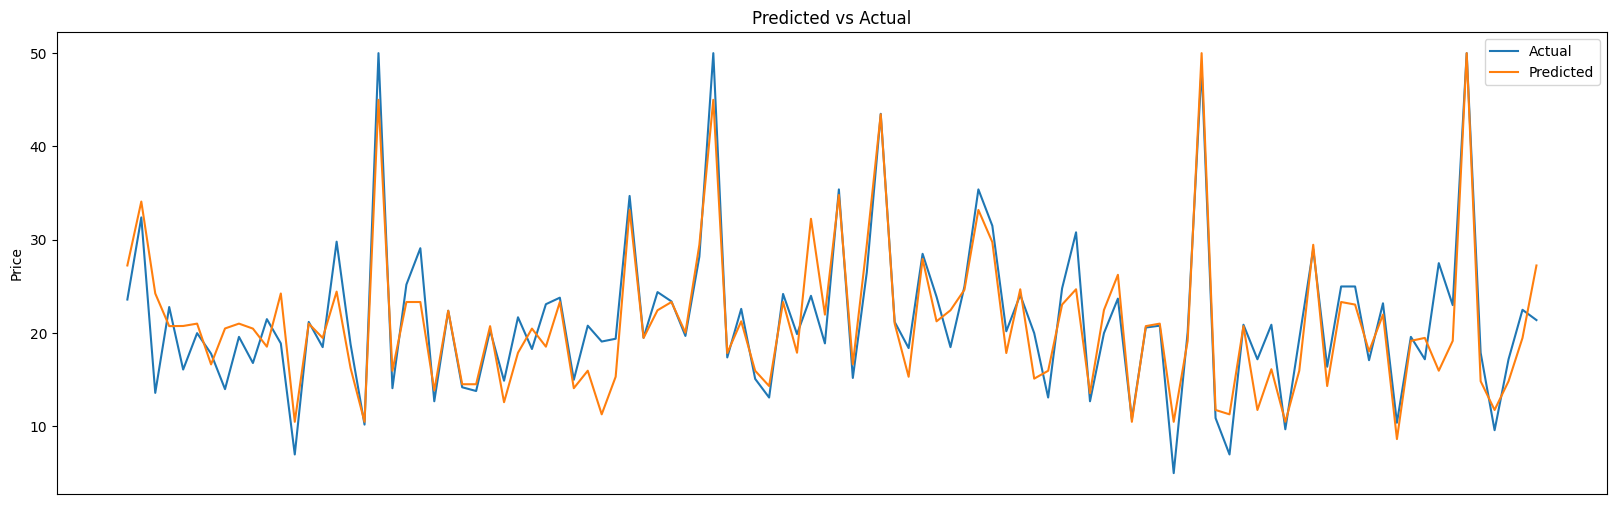

In [51]:
# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_pred)),y_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual')
plt.ylabel('Price')
plt.xticks([])
plt.show()


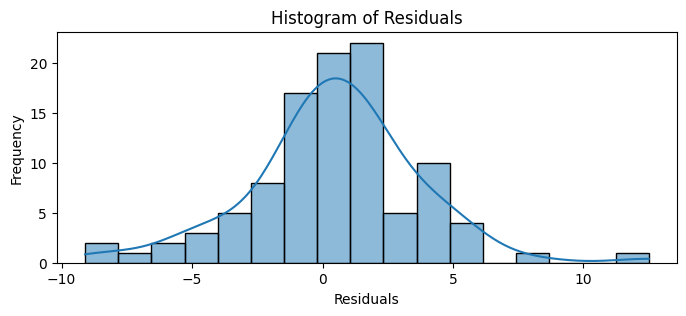

In [36]:
# Generate histogram of residuals
fig, ax = plt.subplots(figsize=(8, 3))
sns.histplot(y_test - y_pred, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

###   * <font color="yellow"> Random Forest Regressor  </font>

In [52]:
categorial_features=['CHAS']
numeric_features=['CRIM', 'ZN', 'INDUS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Define the column transformer to apply the OneHotEncoder to categorical features
# and the MinMaxScaler to numerical features
preprocessor = ColumnTransformer(
    transformers=[
       # ('cat', OneHotEncoder(handle_unknown='ignore'), categorial_features),
        ('num', MinMaxScaler(), numeric_features)
    ])


# Définition du pipeline qui combine le préprocesseur avec le modèle de régression par forêt aléatoire
model_RF = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Définition de la grille des hyperparamètres à tester
param_grid = {
    'regressor__n_estimators': [10, 15, 20],
    'regressor__max_depth': [None, 5, 10],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Création de l'objet GridSearchCV pour rechercher les meilleurs hyperparamètres
grid_search = GridSearchCV(model_RF, param_grid, cv=5)

# Exécution de la recherche sur la grille des hyperparamètres
grid_search.fit(X_train, y_train)

# Obtention des meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_

# Utilisation des meilleurs hyperparamètres pour créer un nouveau modèle
best_model = model_RF.set_params(**best_params)

# Entraînement du nouveau modèle sur l'ensemble des données d'entraînement
best_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test avec le meilleur modèle
y_pred = best_model.predict(X_test)

In [53]:
# Evaluate the model
score = model_RF.score(X_test, y_test)
print("R-squared score on test set: ", score)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE): ", mse)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

R-squared score on test set:  0.8612138758616067
Mean Squared Error (MSE):  10.1777115332266
Mean Absolute Error (MAE):  2.207993260051899


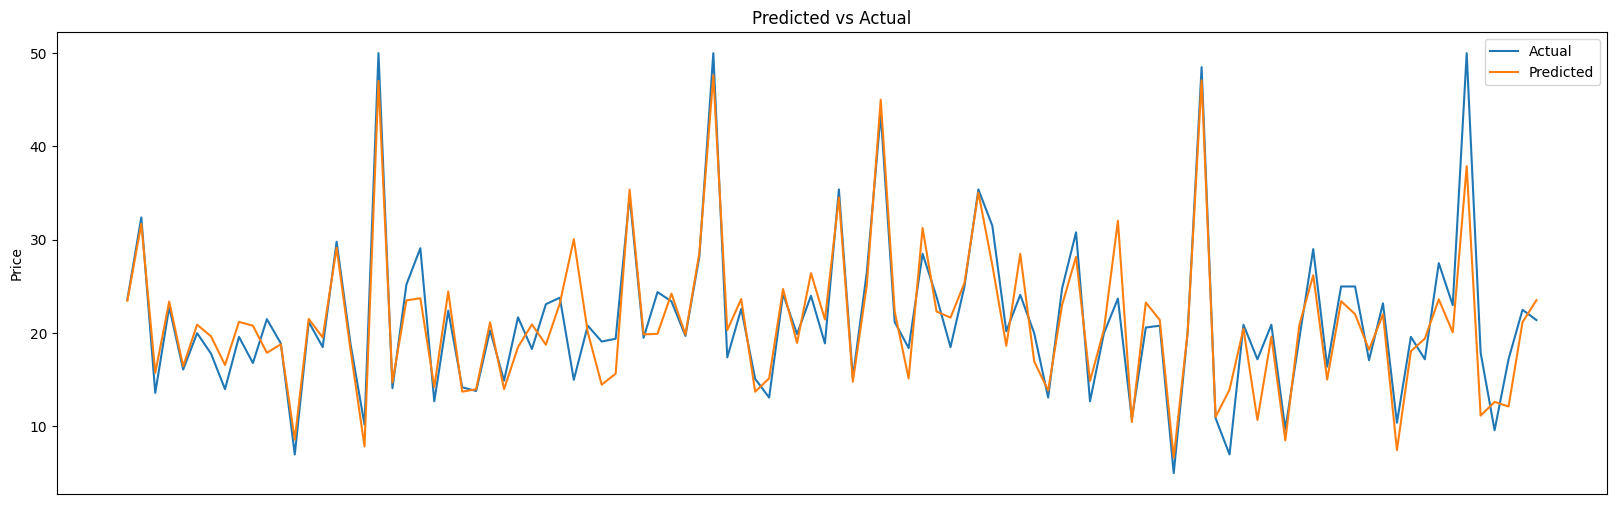

In [54]:
# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_pred)),y_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual')
plt.ylabel('Price')
plt.xticks([])
plt.show()

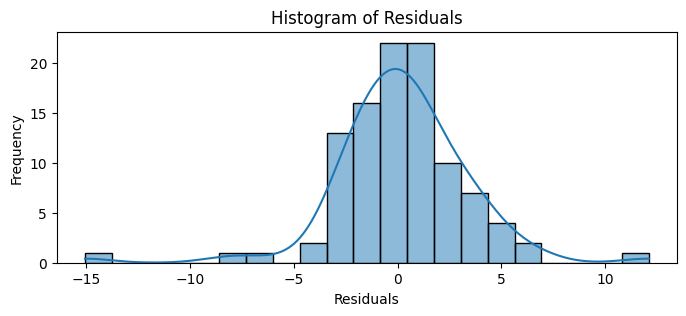

In [55]:
# Generate histogram of residuals
fig, ax = plt.subplots(figsize=(8, 3))
sns.histplot(y_test - y_pred, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()